In [63]:
!pip install pandas

In [64]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [65]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [66]:

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder


In [67]:
data = pd.read_csv('george_wassouf_lyrics_dataset.csv')
data.head()

,Track Title,Track Lyrics,Release year,Composer,Lyricist
0,Aah Habaieb - آه حبايب,اه حبايب بس فين الحب غايب\r\nوليه يا قلبي ما ...,1995,صلاح الشرنوبي,وليد رزيقه
1,Aalem Albi El Shok - علم قلبي الشوق,\r\nيا ليلي يا ليلي يا ليل\r\n\r\nعلم قلبي الش...,2008,صلاح الشرنوبي,احمد شتا
2,Addi Eli Kanou - أدي اللي كانوا,أدي اللي كانوا يا هوا أقرب ما لينا\r\nواللي م...,2008,امجد العاطفي,احمد سامي
3,Alb Al Asheq Daleiloh - قلب العاشق دليله,قلب العاشق دليله\r\nقلب العاشق دليله\r\n\r\nقل...,2002,امجد العاطفي,عوض بدوي
4,Al Forqah Saabah - الفرقة صعبة,مش قادر اصبرعغيابا\r\nكل ليله بجمع دموعي\r\nو ...,2009,جورج يزبك,توفيق بركات


In [68]:
# Number of songs
no_of_songs = data.shape[0]
print(no_of_songs)
# Number of attributes
no_of_attributes = data.shape[1]
print(no_of_attributes)
# Attribute names
attrs = data.columns.tolist()
print(attrs)

78
5
['Track Title', 'Track Lyrics', 'Release year', 'Composer', 'Lyricist']


In [69]:
track_lyrics_df = data['Track Lyrics'].to_frame()
print(track_lyrics_df.head())

                                        Track Lyrics
0   اه حبايب بس فين الحب غايب\r\nوليه يا قلبي ما ...
1  \r\nيا ليلي يا ليلي يا ليل\r\n\r\nعلم قلبي الش...
2   أدي اللي كانوا يا هوا أقرب ما لينا\r\nواللي م...
3  قلب العاشق دليله\r\nقلب العاشق دليله\r\n\r\nقل...
4  مش قادر اصبرعغيابا\r\nكل ليله بجمع دموعي\r\nو ...


In [70]:
data['Track Lyrics'] = data['Track Lyrics'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
data.head()

,Track Title,Track Lyrics,Release year,Composer,Lyricist
0,Aah Habaieb - آه حبايب,اه حبايب بس فين الحب غايب\r\nوليه يا قلبي ما ...,1995,صلاح الشرنوبي,وليد رزيقه
1,Aalem Albi El Shok - علم قلبي الشوق,\r\nيا ليلي يا ليلي يا ليل\r\n\r\nعلم قلبي الش...,2008,صلاح الشرنوبي,احمد شتا
2,Addi Eli Kanou - أدي اللي كانوا,أدي اللي كانوا يا هوا أقرب ما لينا\r\nواللي م...,2008,امجد العاطفي,احمد سامي
3,Alb Al Asheq Daleiloh - قلب العاشق دليله,قلب العاشق دليله\r\nقلب العاشق دليله\r\n\r\nقل...,2002,امجد العاطفي,عوض بدوي
4,Al Forqah Saabah - الفرقة صعبة,مش قادر اصبرعغيابا\r\nكل ليله بجمع دموعي\r\nو ...,2009,جورج يزبك,توفيق بركات


In [71]:
data['Track Title'] = data['Track Title'].apply(lambda x: re.sub(r'[-A-Za-z]', '', x))
data.head()

,Track Title,Track Lyrics,Release year,Composer,Lyricist
0,آه حبايب,اه حبايب بس فين الحب غايب\r\nوليه يا قلبي ما ...,1995,صلاح الشرنوبي,وليد رزيقه
1,علم قلبي الشوق,\r\nيا ليلي يا ليلي يا ليل\r\n\r\nعلم قلبي الش...,2008,صلاح الشرنوبي,احمد شتا
2,أدي اللي كانوا,أدي اللي كانوا يا هوا أقرب ما لينا\r\nواللي م...,2008,امجد العاطفي,احمد سامي
3,قلب العاشق دليله,قلب العاشق دليله\r\nقلب العاشق دليله\r\n\r\nقل...,2002,امجد العاطفي,عوض بدوي
4,الفرقة صعبة,مش قادر اصبرعغيابا\r\nكل ليله بجمع دموعي\r\nو ...,2009,جورج يزبك,توفيق بركات


In [72]:
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_newline_chars(text):
    return text.replace('\n', ' ').replace('\r', '')

def remove_diacritics(text):
    arabic_diacritics = re.compile("""
                                ّ    | # Tashdid
                               ~    | # Shada 
                                َ    | # Fatha
                                ً    | # Tanwin Fath
                                ُ    | # Damma
                                ٌ    | # Tanwin Damm
                                ِ    | # Kasra
                                ٍ    | # Tanwin Kasr
                                ْ    | # Sukun
                                ـ     # Tatwil/Kashida
                            """, re.VERBOSE)
    return re.sub(arabic_diacritics, '', text)

data['Track Lyrics'] = data['Track Lyrics'].apply(remove_punctuation)
data['Track Lyrics'] = data['Track Lyrics'].apply(remove_newline_chars)
data['Track Lyrics'] = data['Track Lyrics'].apply(remove_diacritics)
data['Track Title'] = data['Track Title'].apply(remove_punctuation)
data['Track Title'] = data['Track Title'].apply(remove_newline_chars)
data['Track Title'] = data['Track Title'].apply(remove_diacritics)

data.head()

,Track Title,Track Lyrics,Release year,Composer,Lyricist
0,آه حبايب,اه حبايب بس فين الحب غايب وليه يا قلبي ما لكش...,1995,صلاح الشرنوبي,وليد رزيقه
1,علم قلبي الشوق,يا ليلي يا ليلي يا ليل علم قلبي الشوق الشوق ...,2008,صلاح الشرنوبي,احمد شتا
2,أدي اللي كانوا,أدي اللي كانوا يا هوا أقرب ما لينا واللي ما ه...,2008,امجد العاطفي,احمد سامي
3,قلب العاشق دليله,قلب العاشق دليله قلب العاشق دليله قلب العاشق ...,2002,امجد العاطفي,عوض بدوي
4,الفرقة صعبة,مش قادر اصبرعغيابا كل ليله بجمع دموعي و بسهر م...,2009,جورج يزبك,توفيق بركات


In [73]:
def standardizing_arabic_text(text):
    text = re.sub(r'ي\b', 'ى', text)
    text = text.replace('أ', 'ا')
    text = text.replace('آ', 'ا')
    text = re.sub(r'\bإ', 'ا', text)
    text = re.sub(r'ة\b', 'ه', text)
    return text

data['Track Lyrics'] = data['Track Lyrics'].apply(standardizing_arabic_text)
data['Track Title'] = data['Track Title'].apply(standardizing_arabic_text)
data.head()

,Track Title,Track Lyrics,Release year,Composer,Lyricist
0,اه حبايب,اه حبايب بس فين الحب غايب وليه يا قلبى ما لكش...,1995,صلاح الشرنوبي,وليد رزيقه
1,علم قلبى الشوق,يا ليلى يا ليلى يا ليل علم قلبى الشوق الشوق ...,2008,صلاح الشرنوبي,احمد شتا
2,ادى اللى كانوا,ادى اللى كانوا يا هوا اقرب ما لينا واللى ما ه...,2008,امجد العاطفي,احمد سامي
3,قلب العاشق دليله,قلب العاشق دليله قلب العاشق دليله قلب العاشق ...,2002,امجد العاطفي,عوض بدوي
4,الفرقه صعبه,مش قادر اصبرعغيابا كل ليله بجمع دموعى و بسهر م...,2009,جورج يزبك,توفيق بركات


In [74]:
total_words_before = data['Track Lyrics'].apply(lambda x: len(x.split())).sum()
print(f'Total number of words before removing stopwords: {total_words_before}')

Total number of words before removing stopwords: 31921


In [75]:
words_before = data['Track Lyrics'].apply(lambda x: x.split()).explode()

In [76]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
stop_words = set(stopwords.words('arabic'))
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

data['Track Lyrics'] = data['Track Lyrics'].apply(remove_stopwords)
data['Track Title'] = data['Track Title'].apply(remove_stopwords)
data.head()

,Track Title,Track Lyrics,Release year,Composer,Lyricist
0,اه حبايب,اه حبايب فين الحب غايب وليه قلبى لكش نايب شافو...,1995,صلاح الشرنوبي,وليد رزيقه
1,قلبى الشوق,ليلى ليلى ليل قلبى الشوق الشوق عينى السهر خدنى...,2008,صلاح الشرنوبي,احمد شتا
2,ادى اللى كانوا,ادى اللى كانوا هوا اقرب لينا واللى هانوا هوا ف...,2008,امجد العاطفي,احمد سامي
3,قلب العاشق دليله,قلب العاشق دليله قلب العاشق دليله قلب العاشق د...,2002,امجد العاطفي,عوض بدوي
4,الفرقه صعبه,مش قادر اصبرعغيابا ليله بجمع دموعى بسهر دمعات ...,2009,جورج يزبك,توفيق بركات


In [78]:
total_words_after = data['Track Lyrics'].apply(lambda x: len(x.split())).sum()
print(f'Total number of words after removing stopwords: {total_words_after}')

Total number of words after removing stopwords: 26588


In [79]:
words_after = data['Track Lyrics'].apply(lambda x: x.split()).explode()

In [80]:
eliminated_words = words_before[~words_before.isin(words_after)]
print(f'Total number of eliminated words: {len(eliminated_words)}')
print(f'Eliminated words: {eliminated_words.tolist()}')

Total number of eliminated words: 5333
Eliminated words: ['بس', 'يا', 'ما', 'بس', 'يا', 'يا', 'ما', 'ما', 'ما', 'بس', 'يا', 'يا', 'يا', 'كان', 'حبيب', 'بس', 'بس', 'يا', 'ما', 'بس', 'يا', 'يا', 'ما', 'ما', 'ما', 'بس', 'يا', 'يا', 'يا', 'كان', 'حبيب', 'بس', 'يا', 'يا', 'يا', 'علم', 'علم', 'ع', 'علم', 'علم', 'ع', 'ما', 'علم', 'علم', 'ع', 'يا', 'يا', 'يا', 'يا', 'ما', 'علم', 'علم', 'ع', 'يا', 'قد', 'فوق', 'ما', 'ما', 'قد', 'فوق', 'ما', 'ما', 'ما', 'علم', 'علم', 'ع', 'يا', 'يا', 'يا', 'علم', 'علم', 'ع', 'علم', 'علم', 'ع', 'ما', 'علم', 'علم', 'ع', 'يا', 'يا', 'يا', 'يا', 'ما', 'علم', 'علم', 'ع', 'يا', 'قد', 'فوق', 'ما', 'ما', 'قد', 'فوق', 'ما', 'ما', 'ما', 'علم', 'علم', 'ع', 'يا', 'ما', 'ما', 'يا', 'يا', 'ما', 'ما', 'يا', 'يا', 'يا', 'يا', 'ما', 'ما', 'يا', 'قبل', 'ما', 'على', 'كل', 'قبل', 'ما', 'على', 'كل', 'يا', 'ما', 'ما', 'ما', 'يا', 'يا', 'من', 'غير', 'كان', 'على', 'يا', 'من', 'غير', 'كان', 'على', 'يا', 'يا', 'ما', 'ما', 'ما', 'يا', 'يا', 'ما', 'ما', 'يا', 'يا', 'يا', 'ما', 'ما', 'يا', 

In [81]:
# Tokenize and join with newline characters
data['Tokenized & Preprocessed Lyrics'] = data['Track Lyrics'].apply(lambda x: x.split())
data['Tokenized & Preprocessed Lyrics'] = data['Tokenized & Preprocessed Lyrics'].apply(lambda x: '\n'.join(x))

# Display the result
print(data[['Track Title', 'Track Lyrics', 'Tokenized & Preprocessed Lyrics']].head())

# Save with UTF-8-SIG encoding
data.to_csv('george_wassouf_lyrics_tokenized.csv', index=False, encoding='utf-8-sig')

        Track Title                                       Track Lyrics  \
0          اه حبايب  اه حبايب فين الحب غايب وليه قلبى لكش نايب شافو...   
1        قلبى الشوق  ليلى ليلى ليل قلبى الشوق الشوق عينى السهر خدنى...   
2    ادى اللى كانوا  ادى اللى كانوا هوا اقرب لينا واللى هانوا هوا ف...   
3  قلب العاشق دليله  قلب العاشق دليله قلب العاشق دليله قلب العاشق د...   
4       الفرقه صعبه  مش قادر اصبرعغيابا ليله بجمع دموعى بسهر دمعات ...   

                     Tokenized & Preprocessed Lyrics  
0  اه\nحبايب\nفين\nالحب\nغايب\nوليه\nقلبى\nلكش\nن...  
1  ليلى\nليلى\nليل\nقلبى\nالشوق\nالشوق\nعينى\nالس...  
2  ادى\nاللى\nكانوا\nهوا\nاقرب\nلينا\nواللى\nهانو...  
3  قلب\nالعاشق\nدليله\nقلب\nالعاشق\nدليله\nقلب\nا...  
4  مش\nقادر\nاصبرعغيابا\nليله\nبجمع\nدموعى\nبسهر\...  


In [82]:
print("Total number of songs in the dataset:", no_of_songs)
print("Total number of composers:", data['Composer'].nunique())
print("Total number of lyricists:", data['Lyricist'].nunique())

Total number of songs in the dataset: 78
Total number of composers: 17
Total number of lyricists: 34


Initial invistigation for keywords

In [83]:

# Define the keyword
keyword = "طبيب"
filtered_songs = data[data['Tokenized & Preprocessed Lyrics'].str.contains(keyword, na=False, regex=True)]

# Display the result
print(filtered_songs['Track Title'])


21    الزمن دوار
44          عاشق
71     طبيب جراح
Name: Track Title, dtype: object


In [84]:
# Define the keyword
keyword = "حب"

# Filter songs containing the keyword
filtered_songs = data[data['Tokenized & Preprocessed Lyrics'].str.contains(keyword, na=False, regex=True)].copy()

# Add a column to count occurrences of the keyword in each song
filtered_songs.loc[:, 'Keyword Occurrences'] = filtered_songs['Tokenized & Preprocessed Lyrics'].str.count(keyword)

# Display the result
print(filtered_songs[['Track Title', 'Keyword Occurrences']])

         Track Title  Keyword Occurrences
0           اه حبايب                   24
1         قلبى الشوق                    8
2     ادى اللى كانوا                   12
3   قلب العاشق دليله                   10
4        الفرقه صعبه                   12
..               ...                  ...
73        ياه عالزمن                    8
74        نجوم الليل                   16
75        يوم الوادع                   24
76       زمن العجايب                   18
77            ذكريات                   12

[66 rows x 2 columns]


# Studying word frequency


In [85]:

# Group by 'Song' and calculate the number of words
data['num_words'] = data.groupby('Track Title')['Track Lyrics'].transform(lambda x: x.str.split().str.len().sum())

# Select relevant columns, drop duplicates, and sort by 'num_words' in descending order
full_word_count = (
    data[['Track Title', 'num_words', 'Release year', 'Composer', 'Lyricist']]
    .drop_duplicates()
    .sort_values(by='num_words', ascending=False)
)

In [86]:
# Select the topmost songs with the highest word count
topmost = 10
test_sample = (
    full_word_count.head(topmost)
    .assign(
        num_words=lambda df: df['num_words'].apply(lambda x: f"<div style='background-color:lightblue'>{x}</div>"),
        Song=lambda df: df['Track Title'].apply(lambda x: f"<div style='background-color:lightpink'>{x}</div>")
    )
)

# Install the tabulate package if not already installed
%pip install tabulate

# Convert the DataFrame to an HTML table
from tabulate import tabulate
html_table = tabulate(
    test_sample,
    headers="keys",
    tablefmt="html",
    showindex=False
)

# Display the HTML table
from IPython.core.display import display, HTML
display(HTML(html_table))

Note: you may need to restart the kernel to use updated packages.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3000\3969226881.py:24: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display



Track Title,num_words,Release year,Composer,Lyricist,Song
سهرت الليل,<div style='background-color:lightblue'>992</div>,2004,رياض البندك,رياض البندك,<div style='background-color:lightpink'>سهرت الليل</div>
صياد الطيور,<div style='background-color:lightblue'>755</div>,1993,شاكر الموجي,احمد فواد نجم,<div style='background-color:lightpink'>صياد الطيور</div>
كده كفايه,<div style='background-color:lightblue'>696</div>,2000,امجد العاطفي,بهاء الدين محمد,<div style='background-color:lightpink'>كده كفايه</div>
سلف ودين,<div style='background-color:lightblue'>672</div>,2003,امجد العاطفي,عبير الرزاز,<div style='background-color:lightpink'>سلف ودين</div>
لسه الدنيا بخير,<div style='background-color:lightblue'>640</div>,1996,صلاح الشرنوبي,احمد شتا,<div style='background-color:lightpink'>لسه الدنيا بخير</div>
يوم الوادع,<div style='background-color:lightblue'>612</div>,2001,امجد العاطفي,عوض بدوي,<div style='background-color:lightpink'>يوم الوادع</div>
انا اسف,<div style='background-color:lightblue'>600</div>,1999,امجد العاطفي,عوض بدوي,<div style='background-color:lightpink'>انا اسف</div>
بنفكر بالناس,<div style='background-color:lightblue'>582</div>,2003,امجد العاطفي,فوزي ابراهيم,<div style='background-color:lightpink'>بنفكر بالناس</div>
اسكت,<div style='background-color:lightblue'>575</div>,2003,شاكر الموجي,نبيل افيوني,<div style='background-color:lightpink'>اسكت</div>
طبيب جراح,<div style='background-color:lightblue'>574</div>,1999,شاكر الموجي,صفوح شغاله,<div style='background-color:lightpink'>طبيب جراح</div>


Studying word count distribution

In [87]:
# Calculate lyrics length distribution
lyrics_len_dist = (
    data[['Track Title', 'Tokenized & Preprocessed Lyrics']]
    .assign(Word=lambda df: df['Tokenized & Preprocessed Lyrics'].str.split())
    .explode('Word')
    .groupby('Track Title')
    .size()
    .reset_index(name='num_words')
    .drop_duplicates()
)

# Display the result
print(lyrics_len_dist.head())

      Track Title  num_words
0    7 صاحى الليل        392
1     اتاخرت كتير        332
2  ادى اللى كانوا        414
3    ارضى بالنصيب        160
4            اسكت        575


In [88]:
import numpy as np
from scipy.stats import gaussian_kde

# Function to estimate the mode
def estimate_mode(x):
    density = gaussian_kde(x)
    xs = np.linspace(min(x), max(x), 1000)
    mode = xs[np.argmax(density(xs))]
    return mode

# Calculate mean, median, and mode
mean_count = lyrics_len_dist['num_words'].mean()
median_count = lyrics_len_dist['num_words'].median()
mode_count = estimate_mode(lyrics_len_dist['num_words'])

# Display the results
print(f"Mean: {mean_count}, Median: {median_count}, Mode: {mode_count}")

Mean: 340.87179487179486, Median: 294.0, Mode: 231.73373373373374


Estimation using right skewed normal dist

In [89]:
from scipy.stats import skewnorm

# Fit a skewed normal distribution to the data
param_dist = skewnorm.fit(lyrics_len_dist['num_words'])

# Display the fitted parameters
print(f"Fitted parameters: {param_dist}")

Fitted parameters: (204208556.7265914, 122.99999310416382, 276.72732580892557)


Note: you may need to restart the kernel to use updated packages.


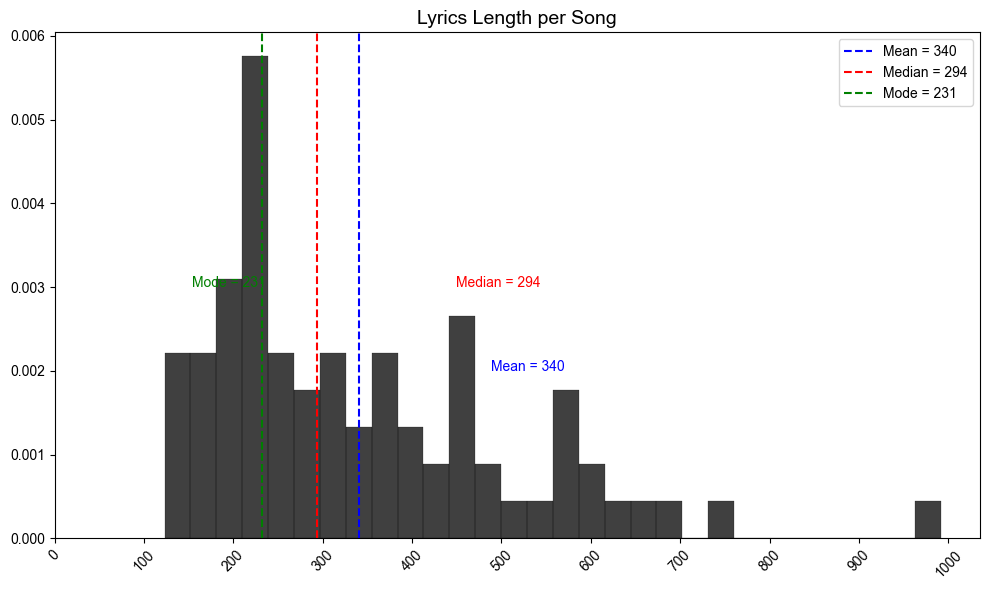

In [90]:

%pip install seaborn --user
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create the plot
plt.figure(figsize=(10, 6))

# Histogram for num_words
sns.histplot(
    lyrics_len_dist['num_words'], 
    stat="density", 
    bins=30, 
    color="black", 
    edgecolor="black", 
    linewidth=0.15
)

# Add vertical lines for mean, median, and mode
plt.axvline(mean_count, color="blue", linestyle="dashed", label=f"Mean = {int(mean_count)}")
plt.axvline(median_count, color="red", linestyle="dashed", label=f"Median = {int(median_count)}")
plt.axvline(mode_count, color="green", linestyle="dashed", label=f"Mode = {int(mode_count)}")

# Add text annotations for mean, median, and mode
plt.text(mean_count + 230, 0.002, f"Mean = {int(mean_count)}", color="blue", fontsize=10, ha="right")
plt.text(median_count + 250, 0.003, f"Median = {int(median_count)}", color="red", fontsize=10, ha="right")
plt.text(mode_count + 5, 0.003, f"Mode = {int(mode_count)}", color="green", fontsize=10, ha="right")

# Customize the plot
plt.title("Lyrics Length per Song", fontsize=14, ha="center")
plt.xlabel("")
plt.ylabel("")
plt.xticks(np.arange(0, lyrics_len_dist['num_words'].max() + 100, 100), rotation=45)
plt.grid(False)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

This shows that the average lyrics length per song is:  340

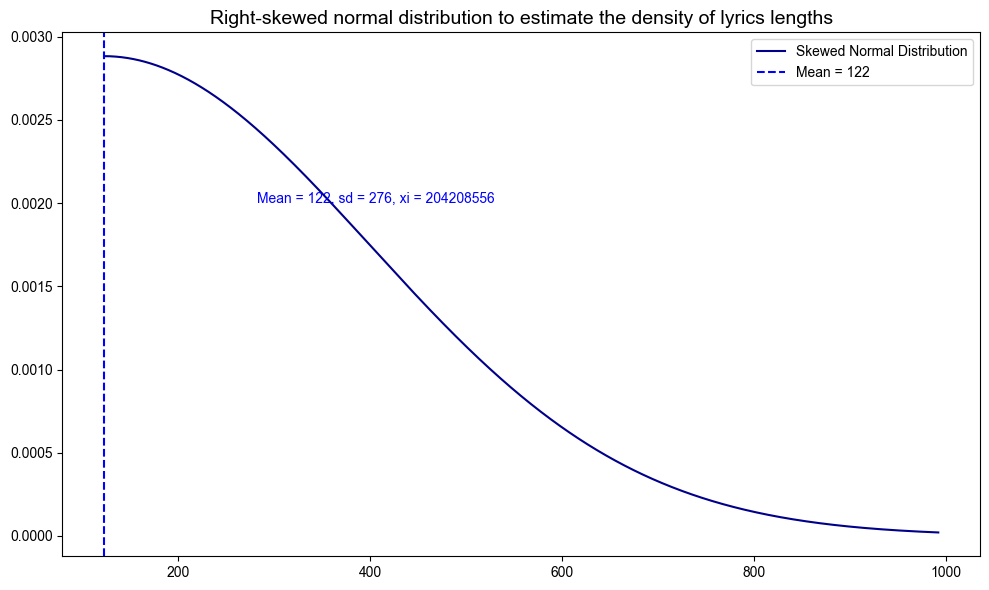

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm

# Generate x values for the distribution
x = np.linspace(lyrics_len_dist['num_words'].min(), lyrics_len_dist['num_words'].max(), 1000)

# Extract parameters from the fitted distribution
shape, loc, scale = param_dist

# Calculate the skewed normal density
y = skewnorm.pdf(x, shape, loc, scale)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, color="darkblue", label="Skewed Normal Distribution")

# Add a vertical line for the mean
mean_value = loc
plt.axvline(mean_value, color="blue", linestyle="dashed", label=f"Mean = {int(mean_value)}")

# Add text annotation for the parameters
plt.text(
    530, 0.002, 
    f"Mean = {int(mean_value)}, sd = {int(scale)}, xi = {int(shape)}", 
    color="blue", fontsize=10, ha="right"
)

# Customize the plot
plt.title("Right-skewed normal distribution to estimate the density of lyrics lengths", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

Studying word count per decade

In [92]:
# Add a 'Decade' column based on the release year
data['Decade'] = (data['Release year'] // 10) * 10

# Calculate word count per song grouped by decade
full_word_count_decade = (
    data[['Track Title', 'Decade', 'Track Lyrics']]
    .assign(Word=lambda df: df['Track Lyrics'].str.split())
    .explode('Word')
    .groupby(['Decade', 'Track Title'])
    .size()
    .reset_index(name='num_words')
    .drop_duplicates()
)

# Display the result
print(full_word_count_decade.head())

   Decade    Track Title  num_words
0    1980    الهوى سلطان        460
1    1980      حلف القمر        378
2    1980      روحى نسمه        574
3    1990   ارضى بالنصيب        160
4    1990  الكلمه الطيبه        211


In [93]:
# Ensure 'Decade' column is of string type
full_word_count_decade['Decade'] = full_word_count_decade['Decade'].astype(str)

# Convert 'Decade' to numeric and create a 'years' column
full_word_count_decade['years'] = full_word_count_decade['Decade'].str.extract(r'(\d+)').astype(int)

# Create a 'part' column based on whether 'Decade' contains "Early"
full_word_count_decade['part'] = full_word_count_decade['Decade'].str.contains("Early").astype(int)

In [94]:
# Sort by 'years' and 'part'
full_word_count_decade = full_word_count_decade.sort_values(by=['years', 'part'])

# Add a new column 'Song_c' with a constant value of 1
full_word_count_decade['Song_c'] = 1

In [95]:
%pip install plotly --user

Note: you may need to restart the kernel to use updated packages.


In [96]:


%pip install plotly
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

# Convert 'Decade' to a categorical type with specific order
decade_order = [
    "Late 1940s", "Early 1950s", "Late 1950s", "Early 1960s", "Late 1960s",
    "Early 1970s", "Late 1970s", "Early 1980s", "Late 1980s"
]
full_word_count_decade['Decade'] = pd.Categorical(full_word_count_decade['Decade'], categories=decade_order, ordered=True)

# Convert to an interactive plot using Plotly
fig = px.histogram(
    full_word_count_decade, 
    x="num_words", 
    facet_col="Decade", 
    facet_col_wrap=3, 
    color="Song_c", 
    nbins=30, 
    title="Evolution of Song Length Across Decades"
)
fig.update_layout(
    xaxis_title=None, 
    yaxis_title="Song Count", 
    title_x=0.5, 
    showlegend=False
)
fig.show()

Note: you may need to restart the kernel to use updated packages.


## POS

In [97]:
%pip install camel-tools
import camel_tools

Note: you may need to restart the kernel to use updated packages.


In [98]:

from camel_tools.disambig.mle import MLEDisambiguator
from camel_tools.tagger.default import DefaultTagger

In [99]:
py_songs = pd.read_csv("george_wassouf_lyrics_tokenized.csv", sep=',', encoding='utf-8')
# Empty fields are replaced by NA.
py_songs=py_songs.fillna("NA")
py_songs.head()

,Track Title,Track Lyrics,Release year,Composer,Lyricist,Tokenized & Preprocessed Lyrics
0,اه حبايب,اه حبايب فين الحب غايب وليه قلبى لكش نايب شافو...,1995,صلاح الشرنوبي,وليد رزيقه,اه\nحبايب\nفين\nالحب\nغايب\nوليه\nقلبى\nلكش\nن...
1,قلبى الشوق,ليلى ليلى ليل قلبى الشوق الشوق عينى السهر خدنى...,2008,صلاح الشرنوبي,احمد شتا,ليلى\nليلى\nليل\nقلبى\nالشوق\nالشوق\nعينى\nالس...
2,ادى اللى كانوا,ادى اللى كانوا هوا اقرب لينا واللى هانوا هوا ف...,2008,امجد العاطفي,احمد سامي,ادى\nاللى\nكانوا\nهوا\nاقرب\nلينا\nواللى\nهانو...
3,قلب العاشق دليله,قلب العاشق دليله قلب العاشق دليله قلب العاشق د...,2002,امجد العاطفي,عوض بدوي,قلب\nالعاشق\nدليله\nقلب\nالعاشق\nدليله\nقلب\nا...
4,الفرقه صعبه,مش قادر اصبرعغيابا ليله بجمع دموعى بسهر دمعات ...,2009,جورج يزبك,توفيق بركات,مش\nقادر\nاصبرعغيابا\nليله\nبجمع\nدموعى\nبسهر\...


In [100]:

# Initialize the MLEDisambiguator and DefaultTagger
#mled = MLEDisambiguator.pretrained()
#tagger = DefaultTagger(mled, 'pos')

# Apply POS tagging
#py_songs["POS Tags"] = [tagger.tag(ly.split()) for ly in py_songs["Track Lyrics"]]
#py_songs["POS Tags"] = py_songs["POS Tags"].apply(lambda x: [tag[1] for tag in x])

# LLMs

## Imports

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm

## Load the dataset


In [102]:
print("Loading dataset: george_wassouf_lyrics_tokenized.csv")
try:
    data = pd.read_csv('george_wassouf_lyrics_tokenized.csv')
    print(f"Dataset loaded successfully. Total songs: {len(data)}")
except FileNotFoundError:
    print("Error: Dataset file 'george_wassouf_lyrics_tokenized.csv' not found.")
    raise

Loading dataset: george_wassouf_lyrics_tokenized.csv
Dataset loaded successfully. Total songs: 78


## Initialize the Hugging Face sentiment analysis pipeline


In [103]:
model_name = "CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment"
print(f"Loading model: {model_name}")
try:
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
    print(f"Model and pipeline initialized successfully for {model_name}")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Try installing transformers==4.44.2 or using 'aubmindlab/bert-base-arabertv2'.")
    raise

Loading model: CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



Model and pipeline initialized successfully for CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment


## Function to analyze sentiment & to infer dominant emotion

In [104]:
def analyze_sentiment(lyrics):
    try:
        # Validate input
        if not isinstance(lyrics, str) or not lyrics.strip():
            print(f"Warning: Empty or invalid lyrics detected. Returning neutral.")
            return "neutral", 0.0
        # Use pipeline with truncation
        result = sentiment_pipeline(lyrics, truncation=True, max_length=512)
        sentiment = result[0]['label']  # e.g., 'positive', 'negative', 'neutral'
        score = result[0]['score']
        print(f"Processed lyrics for sentiment: {sentiment} (score: {score:.2f})")
        return sentiment, score
    except Exception as e:
        print(f"Error processing lyrics: {e}")
        return "neutral", 0.0

def infer_emotion(lyrics, sentiment):
    emotion_keywords = {
        'love': ['حب', 'عشق', 'قلب', 'حبايب'],
        'sadness': ['دموع', 'فرقة', 'غياب', 'حزن'],
        'longing': ['شوق', 'ليل', 'حنين'],
        'joy': ['فرح', 'سعادة', 'نور']
    }
    
    lyrics_lower = lyrics.lower() if isinstance(lyrics, str) else ""
    for emotion, keywords in emotion_keywords.items():
        if any(keyword in lyrics_lower for keyword in keywords):
            print(f"Detected emotion: {emotion} (keywords matched)")
            return emotion
    # Default based on sentiment
    default_emotion = 'joy' if sentiment == 'positive' else 'sadness' if sentiment == 'negative' else 'neutral'
    print(f"No keyword match. Defaulting to emotion: {default_emotion}")
    return default_emotion

In [105]:
# Apply sentiment and emotion analysis with progress bar
print("Starting sentiment and emotion analysis...")
tqdm.pandas()
data['Sentiment'], data['Sentiment_Score'] = zip(*data['Tokenized & Preprocessed Lyrics'].progress_apply(analyze_sentiment))
data['Emotion'] = data.apply(lambda x: infer_emotion(x['Tokenized & Preprocessed Lyrics'], x['Sentiment']), axis=1)
print("Sentiment and emotion analysis completed.")
# Save the updated dataset
data.to_csv('george_wassouf_lyrics_with_sentiment.csv', index=False, encoding='utf-8-sig')
print("Updated dataset saved as 'george_wassouf_lyrics_with_sentiment.csv'.")

Starting sentiment and emotion analysis...


  3%|▎         | 2/78 [00:00<00:23,  3.21it/s]

Processed lyrics for sentiment: negative (score: 0.95)


  4%|▍         | 3/78 [00:01<00:43,  1.71it/s]

Processed lyrics for sentiment: positive (score: 0.96)


  5%|▌         | 4/78 [00:02<00:57,  1.28it/s]

Processed lyrics for sentiment: negative (score: 0.79)


  6%|▋         | 5/78 [00:03<01:00,  1.21it/s]

Processed lyrics for sentiment: positive (score: 0.87)


  8%|▊         | 6/78 [00:03<00:48,  1.48it/s]

Processed lyrics for sentiment: negative (score: 0.94)


  9%|▉         | 7/78 [00:04<00:53,  1.33it/s]

Processed lyrics for sentiment: neutral (score: 0.48)


 10%|█         | 8/78 [00:05<00:56,  1.25it/s]

Processed lyrics for sentiment: neutral (score: 0.70)


 12%|█▏        | 9/78 [00:06<00:49,  1.41it/s]

Processed lyrics for sentiment: positive (score: 0.93)


 13%|█▎        | 10/78 [00:07<00:51,  1.31it/s]

Processed lyrics for sentiment: negative (score: 0.92)


 14%|█▍        | 11/78 [00:07<00:50,  1.32it/s]

Processed lyrics for sentiment: negative (score: 0.54)


 15%|█▌        | 12/78 [00:08<00:51,  1.28it/s]

Processed lyrics for sentiment: negative (score: 0.41)


 17%|█▋        | 13/78 [00:09<00:44,  1.45it/s]

Processed lyrics for sentiment: negative (score: 0.63)


 18%|█▊        | 14/78 [00:10<00:47,  1.36it/s]

Processed lyrics for sentiment: negative (score: 0.49)


 19%|█▉        | 15/78 [00:10<00:45,  1.37it/s]

Processed lyrics for sentiment: negative (score: 0.90)


 21%|██        | 16/78 [00:11<00:46,  1.35it/s]

Processed lyrics for sentiment: negative (score: 0.91)


 22%|██▏       | 17/78 [00:12<00:47,  1.29it/s]

Processed lyrics for sentiment: negative (score: 0.80)


 23%|██▎       | 18/78 [00:13<00:49,  1.21it/s]

Processed lyrics for sentiment: negative (score: 0.76)


 24%|██▍       | 19/78 [00:14<00:51,  1.15it/s]

Processed lyrics for sentiment: negative (score: 0.83)


 26%|██▌       | 20/78 [00:15<00:49,  1.17it/s]

Processed lyrics for sentiment: negative (score: 0.44)


 27%|██▋       | 21/78 [00:15<00:41,  1.36it/s]

Processed lyrics for sentiment: positive (score: 0.96)


 28%|██▊       | 22/78 [00:16<00:41,  1.34it/s]

Processed lyrics for sentiment: negative (score: 0.94)


 29%|██▉       | 23/78 [00:16<00:38,  1.44it/s]

Processed lyrics for sentiment: negative (score: 0.94)


 31%|███       | 24/78 [00:17<00:32,  1.65it/s]

Processed lyrics for sentiment: negative (score: 0.62)


 32%|███▏      | 25/78 [00:18<00:34,  1.53it/s]

Processed lyrics for sentiment: negative (score: 0.44)


 33%|███▎      | 26/78 [00:18<00:31,  1.67it/s]

Processed lyrics for sentiment: negative (score: 0.97)


 35%|███▍      | 27/78 [00:19<00:28,  1.79it/s]

Processed lyrics for sentiment: neutral (score: 0.66)


 36%|███▌      | 28/78 [00:19<00:27,  1.79it/s]

Processed lyrics for sentiment: negative (score: 0.84)


 37%|███▋      | 29/78 [00:20<00:25,  1.94it/s]

Processed lyrics for sentiment: neutral (score: 0.36)


 38%|███▊      | 30/78 [00:20<00:24,  1.96it/s]

Processed lyrics for sentiment: neutral (score: 0.55)


 40%|███▉      | 31/78 [00:21<00:23,  1.97it/s]

Processed lyrics for sentiment: positive (score: 0.94)


 41%|████      | 32/78 [00:21<00:27,  1.69it/s]

Processed lyrics for sentiment: positive (score: 0.96)


 42%|████▏     | 33/78 [00:22<00:26,  1.68it/s]

Processed lyrics for sentiment: negative (score: 0.96)


 44%|████▎     | 34/78 [00:23<00:29,  1.48it/s]

Processed lyrics for sentiment: positive (score: 0.54)


 45%|████▍     | 35/78 [00:24<00:30,  1.43it/s]

Processed lyrics for sentiment: negative (score: 0.88)


 46%|████▌     | 36/78 [00:24<00:31,  1.34it/s]

Processed lyrics for sentiment: positive (score: 0.59)


 47%|████▋     | 37/78 [00:25<00:31,  1.31it/s]

Processed lyrics for sentiment: positive (score: 0.85)


 49%|████▊     | 38/78 [00:26<00:30,  1.31it/s]

Processed lyrics for sentiment: neutral (score: 0.55)


 50%|█████     | 39/78 [00:27<00:30,  1.27it/s]

Processed lyrics for sentiment: negative (score: 0.65)


 51%|█████▏    | 40/78 [00:28<00:29,  1.27it/s]

Processed lyrics for sentiment: negative (score: 0.98)


 53%|█████▎    | 41/78 [00:28<00:25,  1.46it/s]

Processed lyrics for sentiment: negative (score: 0.71)


 54%|█████▍    | 42/78 [00:29<00:22,  1.63it/s]

Processed lyrics for sentiment: negative (score: 0.92)


 55%|█████▌    | 43/78 [00:29<00:19,  1.78it/s]

Processed lyrics for sentiment: negative (score: 0.92)


 56%|█████▋    | 44/78 [00:30<00:20,  1.62it/s]

Processed lyrics for sentiment: positive (score: 0.58)


 58%|█████▊    | 45/78 [00:30<00:20,  1.61it/s]

Processed lyrics for sentiment: positive (score: 0.81)


 59%|█████▉    | 46/78 [00:31<00:17,  1.88it/s]

Processed lyrics for sentiment: negative (score: 0.59)


 60%|██████    | 47/78 [00:31<00:15,  1.97it/s]

Processed lyrics for sentiment: negative (score: 0.60)


 62%|██████▏   | 48/78 [00:31<00:14,  2.11it/s]

Processed lyrics for sentiment: negative (score: 0.87)


 63%|██████▎   | 49/78 [00:32<00:13,  2.17it/s]

Processed lyrics for sentiment: negative (score: 0.86)


 64%|██████▍   | 50/78 [00:33<00:14,  1.99it/s]

Processed lyrics for sentiment: neutral (score: 0.47)


 65%|██████▌   | 51/78 [00:33<00:15,  1.74it/s]

Processed lyrics for sentiment: positive (score: 0.92)


 67%|██████▋   | 52/78 [00:34<00:14,  1.79it/s]

Processed lyrics for sentiment: positive (score: 0.99)


 68%|██████▊   | 53/78 [00:35<00:15,  1.64it/s]

Processed lyrics for sentiment: positive (score: 0.94)


 69%|██████▉   | 54/78 [00:35<00:13,  1.81it/s]

Processed lyrics for sentiment: negative (score: 0.56)


 71%|███████   | 55/78 [00:35<00:11,  2.07it/s]

Processed lyrics for sentiment: neutral (score: 0.44)


 72%|███████▏  | 56/78 [00:36<00:10,  2.16it/s]

Processed lyrics for sentiment: negative (score: 0.80)


 73%|███████▎  | 57/78 [00:36<00:08,  2.39it/s]

Processed lyrics for sentiment: negative (score: 0.96)


 74%|███████▍  | 58/78 [00:37<00:09,  2.14it/s]

Processed lyrics for sentiment: negative (score: 0.94)


 76%|███████▌  | 59/78 [00:37<00:09,  2.07it/s]

Processed lyrics for sentiment: positive (score: 0.85)


 77%|███████▋  | 60/78 [00:38<00:08,  2.02it/s]

Processed lyrics for sentiment: negative (score: 0.93)


 78%|███████▊  | 61/78 [00:38<00:08,  1.91it/s]

Processed lyrics for sentiment: neutral (score: 0.61)


 79%|███████▉  | 62/78 [00:39<00:08,  1.95it/s]

Processed lyrics for sentiment: negative (score: 0.83)


 81%|████████  | 63/78 [00:39<00:08,  1.75it/s]

Processed lyrics for sentiment: positive (score: 0.92)


 82%|████████▏ | 64/78 [00:40<00:08,  1.61it/s]

Processed lyrics for sentiment: negative (score: 0.66)


 83%|████████▎ | 65/78 [00:41<00:08,  1.51it/s]

Processed lyrics for sentiment: neutral (score: 0.44)


 85%|████████▍ | 66/78 [00:42<00:08,  1.46it/s]

Processed lyrics for sentiment: negative (score: 0.96)


 86%|████████▌ | 67/78 [00:42<00:07,  1.43it/s]

Processed lyrics for sentiment: negative (score: 0.73)


 87%|████████▋ | 68/78 [00:43<00:06,  1.52it/s]

Processed lyrics for sentiment: negative (score: 0.78)


 88%|████████▊ | 69/78 [00:44<00:06,  1.46it/s]

Processed lyrics for sentiment: negative (score: 0.84)


 90%|████████▉ | 70/78 [00:44<00:05,  1.53it/s]

Processed lyrics for sentiment: negative (score: 0.99)


 91%|█████████ | 71/78 [00:45<00:04,  1.47it/s]

Processed lyrics for sentiment: negative (score: 0.84)


 92%|█████████▏| 72/78 [00:46<00:03,  1.51it/s]

Processed lyrics for sentiment: neutral (score: 0.43)


 94%|█████████▎| 73/78 [00:46<00:03,  1.45it/s]

Processed lyrics for sentiment: negative (score: 0.77)


 95%|█████████▍| 74/78 [00:47<00:02,  1.61it/s]

Processed lyrics for sentiment: negative (score: 0.93)


 96%|█████████▌| 75/78 [00:47<00:01,  1.89it/s]

Processed lyrics for sentiment: negative (score: 0.98)


 97%|█████████▋| 76/78 [00:48<00:01,  1.70it/s]

Processed lyrics for sentiment: negative (score: 0.95)


 99%|█████████▊| 77/78 [00:49<00:00,  1.58it/s]

Processed lyrics for sentiment: negative (score: 0.96)


100%|██████████| 78/78 [00:49<00:00,  1.51it/s]

Processed lyrics for sentiment: negative (score: 0.83)


100%|██████████| 78/78 [00:50<00:00,  1.54it/s]

Processed lyrics for sentiment: negative (score: 0.72)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: joy (keywords matched)
Detected emotion: love

Updated dataset saved as 'george_wassouf_lyrics_with_sentiment.csv'.


## Visualization

In [106]:
print("Generating sentiment distribution plot...")
data['Release year'] = data['Release year'].astype(str)  # Avoid seaborn warning
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Release year', hue='Sentiment')
plt.title('Sentiment Distribution of George Wassouf Songs by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Song Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sentiment_by_year.png')
plt.close()
print("Sentiment plot saved as 'sentiment_by_year.png'.")
###############
print("Generating emotion distribution plot...")
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Emotion')
plt.title('Emotion Distribution in George Wassouf Songs')
plt.xlabel('Emotion')
plt.ylabel('Song Count')
plt.tight_layout()
plt.savefig('emotion_distribution.png')
plt.close()
print("Emotion plot saved as 'emotion_distribution.png'.")

# Print sample results
print("Sample Results:")
print(data[['Track Title', 'Sentiment', 'Sentiment_Score', 'Emotion']].head())

Generating sentiment distribution plot...
Sentiment plot saved as 'sentiment_by_year.png'.
Generating emotion distribution plot...
Emotion plot saved as 'emotion_distribution.png'.
Sample Results:
        Track Title Sentiment  Sentiment_Score Emotion
0          اه حبايب  negative         0.951673    love
1        قلبى الشوق  positive         0.959222    love
2    ادى اللى كانوا  negative         0.789937    love
3  قلب العاشق دليله  positive         0.874578    love
4       الفرقه صعبه  negative         0.942141    love


## Imports2

In [107]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
%pip install umap-learn
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

Note: you may need to restart the kernel to use updated packages.


## Load the dataset

In [108]:
print("Loading dataset: george_wassouf_lyrics_tokenized.csv")
try:
    data = pd.read_csv('george_wassouf_lyrics_tokenized.csv')
    print(f"Dataset loaded successfully. Total songs: {len(data)}")
except FileNotFoundError:
    print("Error: Dataset file 'george_wassouf_lyrics_tokenized.csv' not found.")
    raise

Loading dataset: george_wassouf_lyrics_tokenized.csv
Dataset loaded successfully. Total songs: 78


## Initialize AraBERT model and tokenizer

In [109]:
model_name = "aubmindlab/bert-base-arabertv2"
print(f"Loading model: {model_name}")
try:
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)
    model.eval()  # Set to evaluation mode
    print(f"Model and tokenizer initialized successfully for {model_name}")
except Exception as e:
    print(f"Error loading model: {e}")
    raise

Loading model: aubmindlab/bert-base-arabertv2


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



Error loading model: Failed to import transformers.models.mamba2.configuration_mamba2 because of the following error (look up to see its traceback):
No module named 'transformers.models.mamba2.configuration_mamba2'


RuntimeError: Failed to import transformers.models.mamba2.configuration_mamba2 because of the following error (look up to see its traceback):
No module named 'transformers.models.mamba2.configuration_mamba2'

## Function to generate sentence-level embeddings

In [ ]:
def get_song_embedding(lyrics, max_length=512):
    try:
        if not isinstance(lyrics, str) or not lyrics.strip():
            print(f"Warning: Empty or invalid lyrics detected. Returning zero embedding.")
            return np.zeros(768)  # AraBERT's hidden size
        
        # Tokenize and encode lyrics
        inputs = tokenizer(lyrics, return_tensors="pt", truncation=True, padding=True, max_length=max_length)
        with torch.no_grad():
            outputs = model(**inputs)
            embeddings = outputs.last_hidden_state  # Shape: (1, seq_len, hidden_size)
        
        # Average token embeddings (exclude [CLS] and [SEP])
        embeddings = embeddings[0, 1:-1, :].mean(dim=0).numpy()  # Shape: (hidden_size,)
        return embeddings
    except Exception as e:
        print(f"Error generating embedding: {e}")
        return np.zeros(768)

## Generate embeddings for all songs

In [ ]:
print("Generating embeddings for songs...")
tqdm.pandas()
data['Embedding'] = data['Tokenized & Preprocessed Lyrics'].progress_apply(get_song_embedding)
embeddings = np.stack(data['Embedding'].values)  # Shape: (n_songs, hidden_size)
print("Embeddings generated successfully.")

# Save embeddings to CSV
embedding_df = pd.DataFrame({
    'Track Title': data['Track Title'],
    'Embedding': [emb.tolist() for emb in embeddings]
})

embedding_df.to_csv('song_embeddings.csv', index=False, encoding='utf-8-sig')
print("Embeddings saved as 'song_embeddings.csv'.")

Generating embeddings for songs...


100%|██████████| 78/78 [00:33<00:00,  2.32it/s]


Embeddings generated successfully.
Embeddings saved as 'song_embeddings.csv'.


In [ ]:
# Perform K-means clustering
n_clusters = 4  # Love, heartbreak, longing, joy
print(f"Performing K-means clustering with {n_clusters} clusters...")
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(embeddings)
print("Clustering completed.")

# Save cluster assignments to CSV
cluster_df = pd.DataFrame({
    'Track Title': data['Track Title'],
    'Cluster': data['Cluster']
})
cluster_df.to_csv('song_clusters.csv', index=False, encoding='utf-8-sig')
print("Cluster assignments saved as 'song_clusters.csv'.")

Performing K-means clustering with 4 clusters...
Clustering completed.
Cluster assignments saved as 'song_clusters.csv'.


In [ ]:
# Compute cosine similarity and find similar songs
print("Computing cosine similarities...")
similarity_matrix = cosine_similarity(embeddings)
np.fill_diagonal(similarity_matrix, 0)  # Ignore self-similarity

# Find top 5 most similar songs for each song
similarity_data = []
for i, title in enumerate(data['Track Title']):
    similar_indices = np.argsort(similarity_matrix[i])[::-1][:5]  # Top 5
    similar_titles = data['Track Title'].iloc[similar_indices].tolist()
    similar_scores = similarity_matrix[i, similar_indices].tolist()
    similarity_data.append({
        'Track Title': title,
        'Similar Songs': "; ".join(similar_titles),
        'Similarity Scores': "; ".join([f"{score:.4f}" for score in similar_scores])
    })

# Save similarity results to CSV
similarity_df = pd.DataFrame(similarity_data)
similarity_df.to_csv('song_similarities.csv', index=False, encoding='utf-8-sig')
print("Similarity results saved as 'song_similarities.csv'.")

Computing cosine similarities...
Similarity results saved as 'song_similarities.csv'.


Generating UMAP visualization...


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


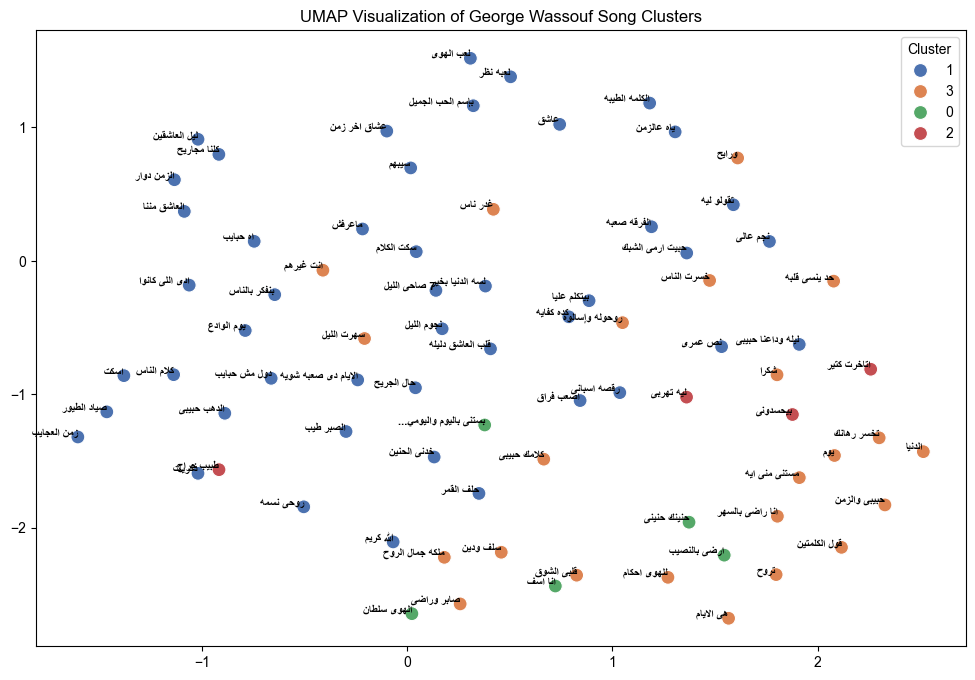

In [ ]:
# Visualize clusters with UMAP
print("Generating UMAP visualization...")
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embeddings = reducer.fit_transform(embeddings)

# Import necessary tools for Arabic text handling
%pip install arabic-reshaper python-bidi
# Update the annotation code in your UMAP visualization
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.font_manager as fm
# Set up font that supports Arabic
plt.rcParams['font.family'] = 'Arial'  # Or another font that supports Arabic

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=umap_embeddings[:, 0],
    y=umap_embeddings[:, 1],
    hue=data['Cluster'].astype(str),
    palette='deep',
    s=100
)

# Improved annotation handling for Arabic text
for i, title in enumerate(data['Track Title']):
    # Properly process Arabic text for display
    if len(title) > 20:
        display_title = title[:20] + '...'
    else:
        display_title = title    
    # Reshape and reorder for proper Arabic display
    display_title = arabic_reshaper.reshape(display_title)
    display_title = get_display(display_title)
    
    plt.annotate(
        display_title, 
        (umap_embeddings[i, 0], umap_embeddings[i, 1]), 
        fontsize=8,
        fontweight='bold',  # Make text more readable
        ha='right'  # Right alignment can work better for Arabic
    )

plt.title('UMAP Visualization of George Wassouf Song Clusters')
plt.savefig('umap_clusters.png', dpi=300, bbox_inches='tight')

# Week11

## More emotion analysis

In [116]:
%pip install deep-translator

from transformers import pipeline
from deep_translator import GoogleTranslator

# Load emotion analysis pipeline (English)
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None)

# Initialize translator
translator = GoogleTranslator(source='ar', target='en')

def analyze_emotions_translated(lyrics):
    if not isinstance(lyrics, str) or lyrics.strip() == '':
        return 'neutral'
    # Translate Arabic to English
    try:
        translated_lyrics = translator.translate(lyrics)
        # Truncate to 512 tokens
        translated_lyrics = ' '.join(translated_lyrics.split()[:512])
        # Get emotion scores
        emotions = emotion_classifier(translated_lyrics)[0]
        dominant_emotion = max(emotions, key=lambda x: x['score'])['label']
        return dominant_emotion
    except Exception as e:
        print(f"Translation error: {e}")
        return 'neutral'

# Apply emotion analysis to translated lyrics
data['Emotion'] = data['Tokenized & Preprocessed Lyrics'].apply(analyze_emotions_translated)

Note: you may need to restart the kernel to use updated packages.


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884

Token indices sequence length is longer than the specified maximum sequence length for this model (554 > 512). Running this sequence through the model will result in indexing errors


Translation error: The expanded size of the tensor (554) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 554].  Tensor sizes: [1, 514]
Translation error: The expanded size of the tensor (630) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 630].  Tensor sizes: [1, 514]
Translation error: The expanded size of the tensor (560) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 560].  Tensor sizes: [1, 514]
Translation error: The expanded size of the tensor (539) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 539].  Tensor sizes: [1, 514]
Translation error: Request exception can happen due to an api connection error. Please check your connection and try again
Translation error: The expanded size of the tensor (594) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 594].  Tensor sizes: [1, 514]
Translation error: Req

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3000\3562857803.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




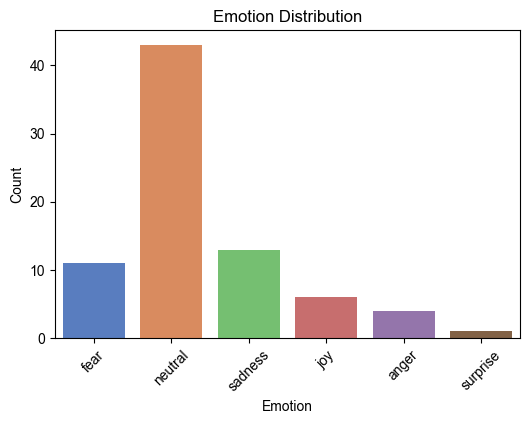

In [117]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Emotion', palette='muted')
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## TF-IDF

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3000\757608435.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




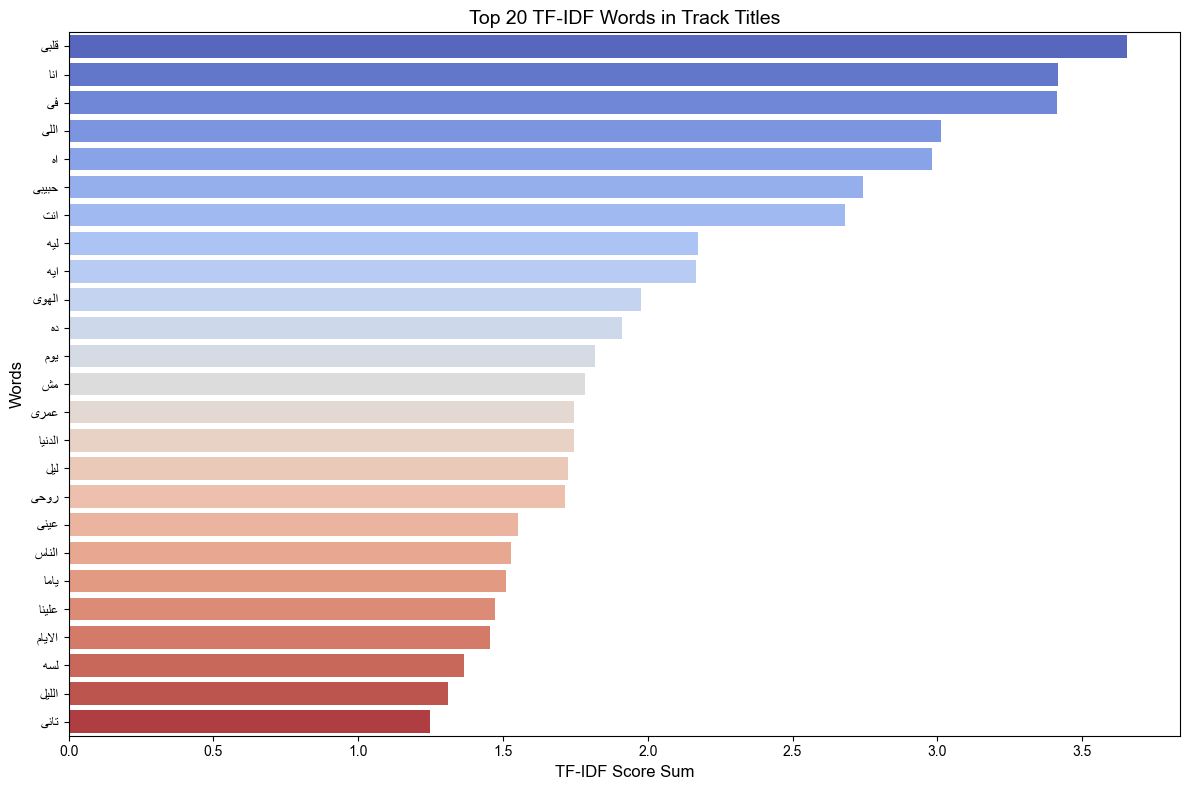

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import seaborn as sns

# Compute TF-IDF for Track Titles
vectorizer_titles = TfidfVectorizer()
tfidf_matrix_titles = vectorizer_titles.fit_transform(data['Tokenized & Preprocessed Lyrics'])

# Get feature names (words) and sum TF-IDF scores across all titles
feature_names_titles = vectorizer_titles.get_feature_names_out()
tfidf_sums_titles = pd.Series(tfidf_matrix_titles.sum(axis=0).A1, index=feature_names_titles)

# Select top 20 words based on TF-IDF sums
top_words_titles = tfidf_sums_titles.sort_values(ascending=False).head(25)

# Process Arabic text for proper display
arabic_words_titles = top_words_titles.index.tolist()
display_words_titles = []
for word in arabic_words_titles:
    reshaped_word = arabic_reshaper.reshape(word)
    display_word = get_display(reshaped_word)
    display_words_titles.append(display_word)

# Create a new Series with processed Arabic words
processed_tfidf_titles = pd.Series(top_words_titles.values, index=display_words_titles)

# Plot the top 20 TF-IDF words for Track Titles
plt.figure(figsize=(12, 8))
sns.barplot(x=processed_tfidf_titles.values, y=processed_tfidf_titles.index, palette='coolwarm')
plt.title("Top 20 TF-IDF Words in Track Titles", fontsize=14)
plt.xlabel("TF-IDF Score Sum", fontsize=12)
plt.ylabel("Words", fontsize=12)
plt.tight_layout()
plt.show()

## Group by composer

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

composer_lyrics = data.groupby('Composer')['Tokenized & Preprocessed Lyrics'].apply(lambda x: ' '.join(x)).reset_index()

# Apply TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(composer_lyrics['Tokenized & Preprocessed Lyrics'])

# Get the words (features)
feature_names = vectorizer.get_feature_names_out()

# Show top 10 words for each composer
N = 10
for i, composer in enumerate(composer_lyrics['Composer']):
    tfidf_scores = tfidf_matrix[i].toarray().flatten()
    top_indices = tfidf_scores.argsort()[-N:][::-1]  # Get indices of top N scores
    top_words = [feature_names[idx] for idx in top_indices]
    print(f"Top words for {composer}: {top_words}")

Top words for امجد العاطفي: ['اتوب', 'فى', 'انا', 'اللى', 'انت', 'قلبى', 'الايام', 'اه', 'حبيبى', 'كده']
Top words for جورج يزبك: ['سلطان', 'الهوى', 'اشكى', 'القلوب', 'للزمان', 'عاشقين', 'لى', 'ويقول', 'الزمان', 'بعذابه']
Top words for رياض البندك: ['ليل', 'اتغير', 'حزين', 'ومهما', 'خلينا', 'تتغير', 'مصير', 'انا', 'العمر', 'ده']
Top words for زياد برجى: ['بضحك', 'بيحسدونى', 'بختك', 'اه', 'فى', 'حواليك', 'تحبك', 'وبيقولولى', 'ده', 'جنبك']
Top words for شاكر الموجي: ['فى', 'ياما', 'فين', 'انا', 'جراح', 'صياد', 'الناس', 'اللى', 'اه', 'الوعود']
Top words for صابر كمال: ['يابا', 'قوال', 'يتقال', 'الجريح', 'بالكلام', 'حال', 'بسؤال', 'يطيب', 'الحنان', 'يتطلب']
Top words for صلاح الشرنوبي: ['قلبى', 'انا', 'مره', 'لسه', 'انت', 'اه', 'فى', 'حبيبى', 'عمرى', 'كلام']
Top words for طارق ابو جوده: ['شو', 'حبيبى', 'انا', 'حياتى', 'الهوى', 'تشتكى', 'لحالك', 'طلع', 'يجمعنا', 'بتمنى']
Top words for مازن زوائدي: ['ليه', 'تهربى', 'وتحيرى', 'وتبعدى', 'بسكه', 'سفر', 'بسؤال', 'قلبى', 'الرحيل', 'درب']
Top word

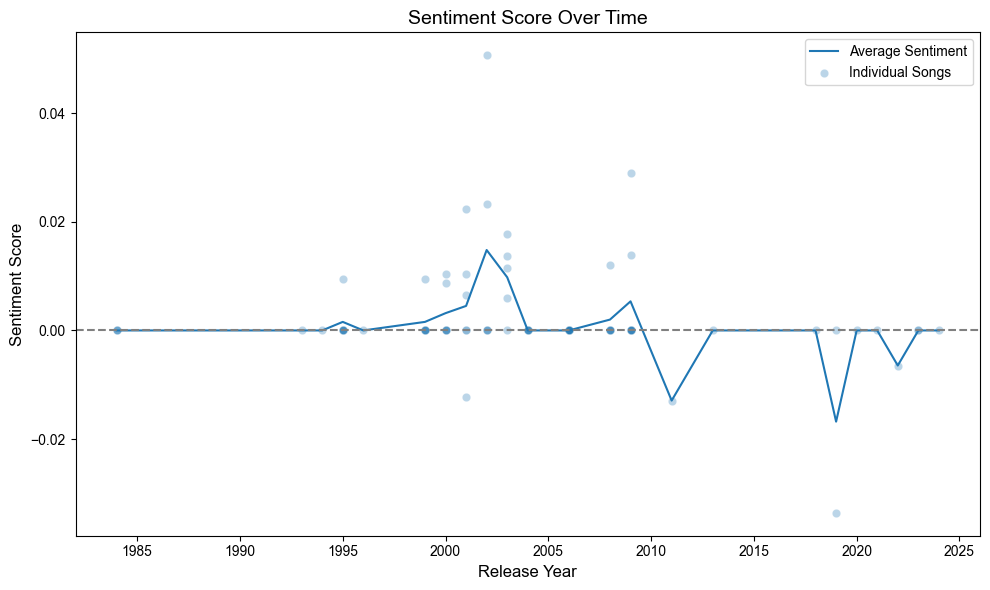

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Expanded lists of Arabic positive and negative words (customize further as needed)
positive_words = ["حب", "فرح", "جميل", "سعادة", "أمل", "سلام", "بهجة", "حنان"]
negative_words = ["حزن", "ألم", "دموع", "كره", "خوف", "غضب", "أسى", "يأس"]

def sentiment_score(lyrics):
    words = lyrics.split()  # Split lyrics into words
    total_words = len(words)
    pos_count = sum(1 for word in words if word in positive_words)
    neg_count = sum(1 for word in words if word in negative_words)
    if total_words == 0:
        return 0  # Neutral if no words are present
    return (pos_count - neg_count) / total_words  # Sentiment score per word

# Assuming 'data' is your DataFrame with 'Track Lyrics' and 'Release year' columns
data['sentiment'] = data['Tokenized & Preprocessed Lyrics'].apply(sentiment_score)

# Calculate average sentiment per year
yearly_sentiment = data.groupby('Release year')['sentiment'].mean().reset_index().sort_values('Release year')

# Plot sentiment over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Release year', y='sentiment', data=yearly_sentiment, label='Average Sentiment')
sns.scatterplot(x='Release year', y='sentiment', data=data, alpha=0.3, label='Individual Songs')
plt.axhline(0, color='gray', linestyle='--')  # Reference line at neutral sentiment
plt.title('Sentiment Score Over Time', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning:

`return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.



Error processing lyrics: The size of tensor a (522) must match the size of tensor b (512) at non-singleton dimension 1
Error processing lyrics: The size of tensor a (608) must match the size of tensor b (512) at non-singleton dimension 1
Error processing lyrics: The size of tensor a (758) must match the size of tensor b (512) at non-singleton dimension 1
Error processing lyrics: The size of tensor a (888) must match the size of tensor b (512) at non-singleton dimension 1
Error processing lyrics: The size of tensor a (660) must match the size of tensor b (512) at non-singleton dimension 1
Error processing lyrics: The size of tensor a (838) must match the size of tensor b (512) at non-singleton dimension 1
Error processing lyrics: The size of tensor a (662) must match the size of tensor b (512) at non-singleton dimension 1
Error processing lyrics: The size of tensor a (592) must match the size of tensor b (512) at non-singleton dimension 1
Error processing lyrics: The size of tensor a (7

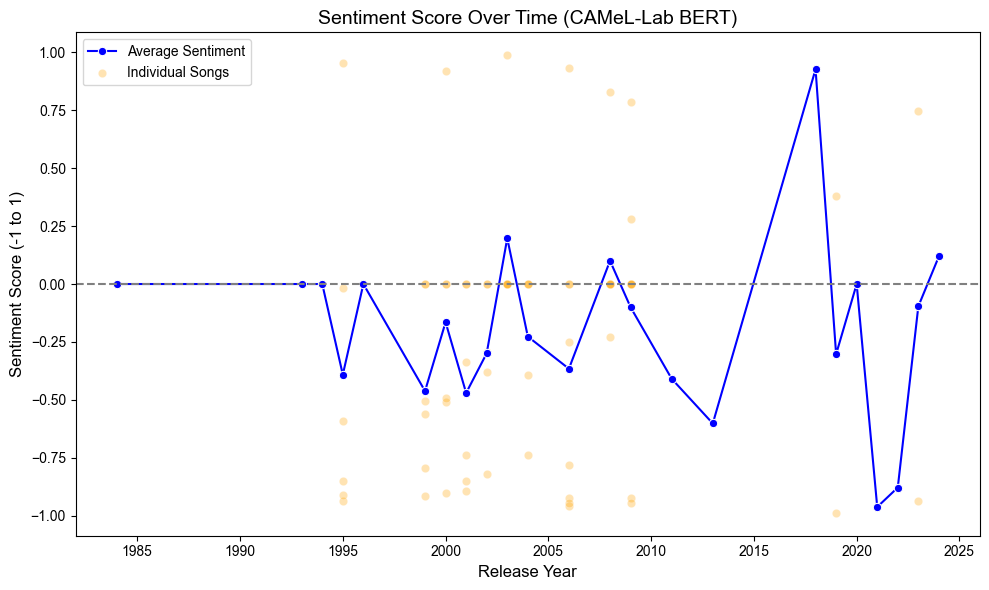

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

# Initialize the sentiment analysis pipeline
try:
    sentiment_analyzer = pipeline(
        "sentiment-analysis",
        model="CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment",
        tokenizer="CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment",
        return_all_scores=True
    )
except Exception as e:
    print(f"Error loading model: {e}")
    print("Ensure 'transformers' and 'torch' are installed and try again.")
    raise

def sentiment_score(lyrics):
    # Handle empty or invalid lyrics
    if not isinstance(lyrics, str) or len(lyrics.strip()) == 0:
        return 0
    
    try:
        # Run sentiment analysis
        result = sentiment_analyzer(lyrics)[0]
        
        # Map labels to scores: positive (+1), neutral (0), negative (-1)
        score = 0
        for item in result:
            label = item['label']
            if label == 'positive':
                score += item['score']
            elif label == 'negative':
                score -= item['score']
            # Neutral contributes 0 (no change)
        
        return score  # Returns a score roughly between -1 and 1
    except Exception as e:
        print(f"Error processing lyrics: {e}")
        return 0  # Return neutral score on error

# Apply sentiment scoring to your DataFrame
data['sentiment'] = data['Tokenized & Preprocessed Lyrics'].apply(sentiment_score)

# Calculate average sentiment per year
yearly_sentiment = data.groupby('Release year')['sentiment'].mean().reset_index().sort_values('Release year')

# Plot sentiment over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Release year', y='sentiment', data=yearly_sentiment, label='Average Sentiment', color='blue', marker='o')
sns.scatterplot(x='Release year', y='sentiment', data=data, alpha=0.3, label='Individual Songs', color='orange')
plt.axhline(0, color='gray', linestyle='--')  # Reference line at neutral
plt.title('Sentiment Score Over Time (CAMeL-Lab BERT)', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Sentiment Score (-1 to 1)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()